In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("pokemon.csv")

## Exploratory Data Analysis

In [3]:
train.shape

(304, 30001)

In [4]:
train

,0,1,2,3,4,5,6,7,8,9,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,target
0,37,106,111,37,106,111,37,106,111,37,...,37,106,111,37,106,111,37,106,111,Charmander
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Charmander
2,103,244,68,91,234,60,86,226,53,91,...,78,219,57,78,218,53,123,255,74,Pikachu
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Pikachu
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bulbasaur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,9,65,17,9,65,17,9,65,17,9,...,121,121,121,102,124,118,73,184,155,Bulbasaur
300,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Pikachu
301,0,6,6,1,7,7,1,7,9,1,...,118,124,124,142,144,145,118,119,120,Pikachu
302,255,250,247,255,250,247,255,250,247,255,...,252,233,226,253,220,217,255,186,191,Pikachu


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 30001 entries, 0 to target
dtypes: int64(30000), object(1)
memory usage: 69.6+ MB


In [6]:
train.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
29996     0
29997     0
29998     0
29999     0
target    0
Length: 30001, dtype: int64

<AxesSubplot:>

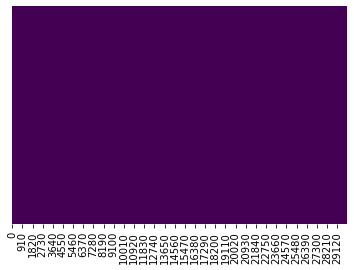

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [8]:
y = train["target"].values
y.shape

(304,)

In [9]:
X = train.drop(columns = ["target"], inplace = False)
X = X.values
X.shape

(304, 30000)

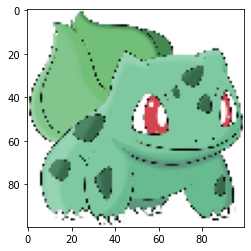

In [14]:
plt.imshow(X[5].reshape(100,100,3))

In [15]:
#Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(243, 30000) (243,)
(61, 30000) (61,)


## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()

In [18]:
LRmodel.fit(X_train, y_train)
y_predict_LR = LRmodel.predict(X_test)
y_predict_LR

C:\Users\riyac\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['Bulbasaur', 'Pikachu', 'Charmander', 'Charmander', 'Bulbasaur',
       'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Charmander', 'Charmander', 'Pikachu',
       'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Bulbasaur',
       'Bulbasaur', 'Charmander', 'Charmander', 'Bulbasaur', 'Bulbasaur',
       'Charmander', 'Pikachu', 'Bulbasaur', 'Charmander', 'Bulbasaur',
       'Bulbasaur', 'Charmander', 'Charmander', 'Pikachu', 'Bulbasaur',
       'Charmander', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu',
       'Bulbasaur', 'Pikachu', 'Charmander', 'Bulbasaur', 'Charmander',
       'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Bulbasaur',
       'Charmander', 'Charmander', 'Charmander', 'Bulbasaur',
       'Charmander', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Charmander',
       'Charmander'], dtype=object)

In [19]:
LRmodel.score(X_test, y_test)

0.9836065573770492

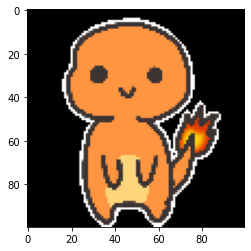

Actual Label:  Charmander
Predicted Label:  ['Charmander']


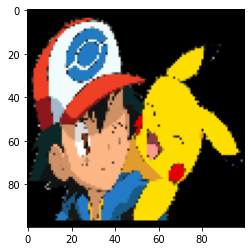

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


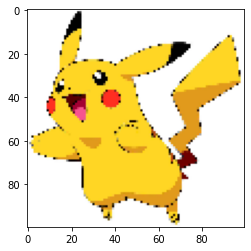

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


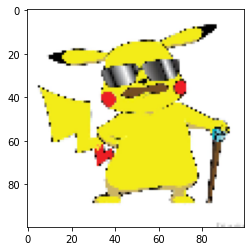

Actual Label:  Pikachu
Predicted Label:  ['Pikachu']


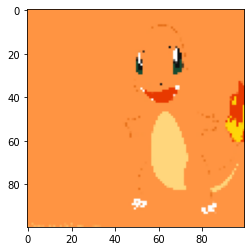

Actual Label:  Charmander
Predicted Label:  ['Charmander']


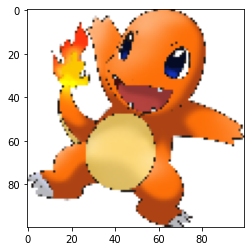

Actual Label:  Charmander
Predicted Label:  ['Charmander']


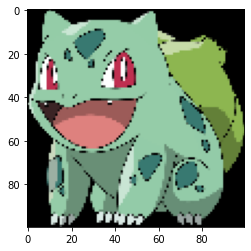

Actual Label:  Bulbasaur
Predicted Label:  ['Bulbasaur']


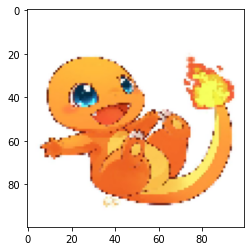

Actual Label:  Charmander
Predicted Label:  ['Charmander']


In [20]:
for i in [2, 6, 8, 10 , 23, 60, 56, 49]:
  random_img = X_test[i]
  plt.imshow(random_img.reshape(100,100,3))
  plt.show()
  print("Actual Label: ", y_test[i])
  p = LRmodel.predict([random_img])
  print("Predicted Label: ", p)